In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
ds = pd.read_csv('College_Data')

In [6]:
ds[:2]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


In [8]:
ds['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
Private = pd.get_dummies(ds.iloc[:,1])

In [10]:
Private[:2]

,No,Yes
0,0,1
1,0,1


In [15]:
ds = pd.concat([ds.iloc[:,2:18],Private.iloc[:,0]],axis=1)

In [16]:
ds[:2]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,No
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,0
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,0


In [17]:
X = ds.iloc[:].values

# Apply Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
X_sc = sc.fit_transform(X)

# Split data into training set and test set

In [22]:
# For clustering No Need

# 1. K-Means Clustering

In [24]:
from sklearn.cluster import KMeans

In [45]:
WCSS = []

In [46]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_sc)
    WCSS.append(kmeans.inertia_)

Text(0.5,1,'K-Means')

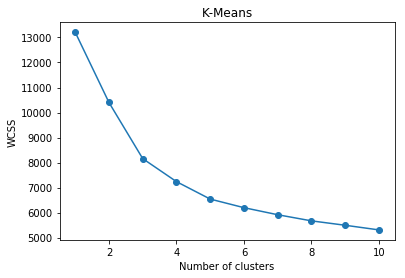

In [47]:
plt.scatter(range(1,11),WCSS)
plt.plot(range(1,11),WCSS)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-Means')

In [48]:
WCSS

[13209.0,
 10401.219043816207,
 8157.6433230713492,
 7237.841824956171,
 6540.6166473563617,
 6197.3864134362057,
 5915.2377837172917,
 5670.1057451226134,
 5494.0621816868979,
 5308.4229977422765]

In [49]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)

In [50]:
y_pred_kmeans = kmeans.fit_predict(X_sc)

# 2. Hierarchical clustering

In [29]:
import scipy.cluster.hierarchy as sch

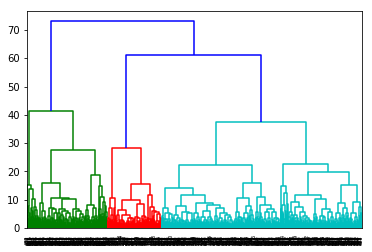

In [51]:
dendrogram = sch.dendrogram(sch.linkage(X_sc,method='ward', metric='euclidean'))

In [38]:
from sklearn.cluster.hierarchical import AgglomerativeClustering

In [39]:
h_ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [52]:
y_pred_h_ag = h_ag.fit_predict(X_sc)

# Apply PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=None,random_state=0)

In [53]:
X_pca = pca.fit_transform(X_sc)

In [54]:
pca.explained_variance_ratio_

array([ 0.30611347,  0.28744863,  0.06905767,  0.05974757,  0.05434736,
        0.04830618,  0.03462074,  0.03160903,  0.03121457,  0.02111534,
        0.01831142,  0.01102771,  0.00994973,  0.00848148,  0.0051711 ,
        0.00212084,  0.00135717])

In [55]:
pca_2 = PCA(n_components=2,random_state=0)

In [56]:
X_pca_2 = pca_2.fit_transform(X_sc)

In [57]:
pca_2.explained_variance_ratio_

array([ 0.30611347,  0.28744863])

# 1a. K-Means

In [58]:
WCSS = []

In [59]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_pca_2)
    WCSS.append(kmeans.inertia_)

In [60]:
WCSS

[7840.3617903156874,
 5057.4569184071925,
 2826.5770762107568,
 2143.2347592302863,
 1556.6895638802298,
 1316.1375786855665,
 1132.4538999015131,
 991.56932710761726,
 871.41496731487723,
 770.47706637646365]

Text(0.5,1,'K-Means')

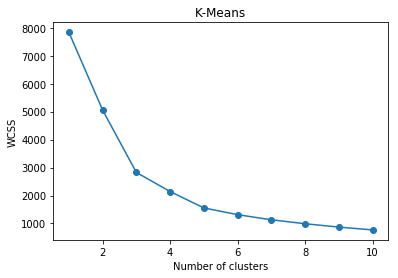

In [63]:
plt.scatter(range(1,11),WCSS)
plt.plot(range(1,11),WCSS)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-Means')

In [64]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)

In [65]:
y_pred_kmeans = kmeans.fit_predict(X_pca_2)

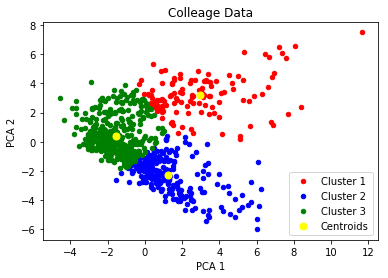

In [67]:
# Visualising the clusters
plt.scatter(X_pca_2[y_pred_kmeans == 0, 0], X_pca_2[y_pred_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca_2[y_pred_kmeans == 1, 0], X_pca_2[y_pred_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca_2[y_pred_kmeans == 2, 0], X_pca_2[y_pred_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Colleage Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# 2a. Hierarchical clustering

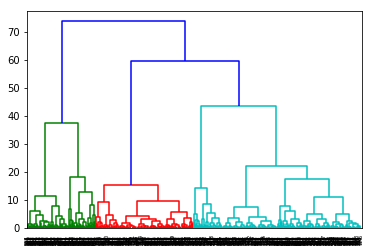

In [62]:
dendrogram = sch.dendrogram(sch.linkage(X_pca_2,method='ward', metric='euclidean'))

In [68]:
h_ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [69]:
y_pred_h_ag = h_ag.fit_predict(X_pca_2)

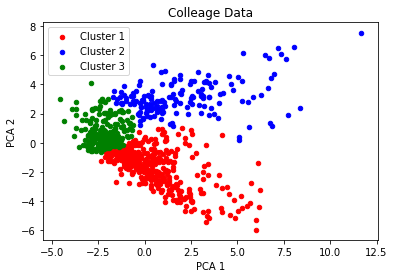

In [70]:
# Visualising the clusters
plt.scatter(X_pca_2[y_pred_h_ag == 0, 0], X_pca_2[y_pred_h_ag == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca_2[y_pred_h_ag == 1, 0], X_pca_2[y_pred_h_ag == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca_2[y_pred_h_ag == 2, 0], X_pca_2[y_pred_h_ag == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.title('Colleage Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()